![TP](TeachersPro-logo-color.png)

# Descriptive analytics

### Lenin Escobar <lenin.escobar@net.teacherspro.com> - Descriptive analytics (27-Jul-2021)

In [1]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib notebook
%matplotlib inline
%run Users_Helper.ipynb
%run Users_Plot.ipynb

<h1 style="background-color:#D7F5FF;">Data Ingestion</h1>

In [2]:
#!pip install openpyxl

In [3]:
#! pip install mpld3

In [4]:
#! pip install plotly

In [5]:
#!sudo apt install texlive-full

In [6]:
#pip install voila

In [7]:
#pip install imblearn

In [8]:
current_plot_dir = os.path.join(CWD, PLOT_DIR)

In [9]:
current_dir = os.path.join(CWD, DATA_DIR)
current_file_xlsx = os.path.join(current_dir, USERS_XLSX)
#df_users_ori = pd.read_excel('TPro_Users_20210606_1.xlsx', engine='openpyxl', index_col=0)
df_users_ori = pd.read_excel(current_file_xlsx, engine='openpyxl')

In [10]:
df_users_ori.head(1)

,id,usuario,usuario_pago,correo_confirmado,patrocinador,como_llego_lic,idioma,fecha_de_registro,fecha_ulltimo_acceso,actividad,...,cupon_en_uso,evidencias_consultadas,evidencias_evaluadas,cantidad_chats,habilidades_completadas,tripartita,ultima_habilidad_en_desarrollo,desafíos_acabados,habilidades_acabadas,habilidades_acabadas_con_insignia
0,45,autor@autor,No,Sí,NaN,NaN,es,2016-03-08 10:40:13,2021-01-11 10:58:17,5,...,NaN,1,0,1,15,No,FLIPPED LEARNING: CÓMO DAR LA VUELTA A LAS CLASES,APRENDIZAJE COOPERATIVO 2017,"EMPATÍA Y COMUNICACIÓN EFICAZ, ASEQUIBILIDAD DE LAS ACTIVIDADES, DIAGNÓSTICO PARA EL APRENDIZAJE, FLEXIBILIDAD EN EL USO DE ESPACIOS, CONFLICTO COGNITIVO Y ACTIVACIÓN MENTAL, UTILIZACIÓN DE ESPACIOS EXTERNOS AL CENTRO, LAS FASES DE LA EVALUACIÓN, AUTOESTIMA Y AUTOCONCEPTO, CÓMO EVALUAR LAS COMPETENCIAS, APRENDIZAJE AUTÓNOMO, APRENDIZAJE BASADO EN PROBLEMAS, APRENDIZAJE SIGNIFICATIVO Y FUNCIONAL, ACTIVIDADES DE PARTICIPACIÓN, GESTIÓN DEL TIEMPO y INSTRUMENTOS DE EVALUACIÓN",NaN


In [11]:
df_users_ori.dtypes

id                                           int64
usuario                                     object
usuario_pago                                object
correo_confirmado                           object
patrocinador                                object
como_llego_lic                              object
idioma                                      object
fecha_de_registro                           object
fecha_ulltimo_acceso                        object
actividad                                    int64
reputacion                                 float64
nombre                                      object
apellidos                                   object
docencia                                    object
pais                                        object
ciudad                                      object
codigo_postal                               object
telefono                                    object
desafio_en_curso                            object
institucion_principal          

In [12]:
# using dictionary to convert specific columns
convert_dict = {
                'id': 'int',
                'usuario': 'string',
                'usuario_pago': 'string',
                'correo_confirmado': 'string',
                'patrocinador': 'string',
                'como_llego_lic': 'string',
                'idioma': 'string',
                'fecha_de_registro': 'string',
                'fecha_ulltimo_acceso': 'string',
                'actividad': 'int',
                'reputacion': 'float64',
                'nombre': 'string',
                'apellidos': 'string',
                'docencia': 'string',
                'pais': 'string',
                'ciudad': 'string',
                'codigo_postal': 'string',
                'telefono': 'string',
                'desafio_en_curso': 'string',
                'institucion_principal': 'string',
                'institucion_secundaria': 'string',
                'notificacion_nuevo_contacto': 'string',
                'notificacion_nuevo_mensaje': 'string',
                'notificacion_desafio_contacto': 'string',
                'notificacion_calif_evidencia': 'string',
                'notificacion_invitacion_calif_evidencia': 'string',
                'notificacion_material_tgp': 'string',
                'notificacion_informe_mensual': 'string',
                'cupon_en_uso': 'string',
                'evidencias_consultadas': 'int',
                'evidencias_evaluadas': 'int',
                'cantidad_chats': 'int',
                'habilidades_completadas': 'int',
                'tripartita': 'string',
                'ultima_habilidad_en_desarrollo': 'string',
                'desafíos_acabados': 'string',
                'habilidades_acabadas': 'string',
                'habilidades_acabadas_con_insignia': 'string'
               }

In [13]:
#Initial transformation
df_users_conv = df_users_ori.astype(convert_dict)

In [14]:
#Date format
df_users_conv["fecha_de_registro"] = pd.to_datetime(df_users_conv["fecha_de_registro"],format='%Y%m%d %H:%M:%S')
df_users_conv["fecha_ulltimo_acceso"] = pd.to_datetime(df_users_conv["fecha_ulltimo_acceso"],format='%Y%m%d %H:%M:%S')

In [15]:
#Feature engineering
df_users_conv["habilidades_acabadas_cnt"] = df_users_conv["habilidades_acabadas"].apply(lambda x: x.count(",") + 1 if isinstance(x,str) else 0 )
df_users_conv["habilidades_acabadas_con_insignia_cnt"] = df_users_conv["habilidades_acabadas_con_insignia"].apply(lambda x: x.count(",") + 1 if isinstance(x,str) else 0 )

In [16]:
df_users_conv["habilidades_acabadas"].apply(lambda x : x.count(",") + 1 if isinstance(x,str) else 0)

0       14
1        0
2        1
3        2
4        2
        ..
9926     0
9927     0
9928     0
9929     0
9930     0
Name: habilidades_acabadas, Length: 9931, dtype: int64

In [17]:
#Initializing empty abilities list
ability_lst = []

In [18]:
dataframeHelper = DataframeHelper(version = "1.0")
print(dataframeHelper)

Dataframe helper version 1.0


In [19]:
df_users_conv["habilidades_acabadas"].apply(lambda x : dataframeHelper.custom_append_lst(x, ability_lst) if isinstance(x,str) else ability_lst.append("") )
#ability_lst = list(dict.fromkeys(ability_lst))

0       None
1       None
2       None
3       None
4       None
        ... 
9926    None
9927    None
9928    None
9929    None
9930    None
Name: habilidades_acabadas, Length: 9931, dtype: object

In [20]:
#df_users_conv['fecha_de_registro_month'] = pd.DatetimeIndex(df_users_conv['fecha_de_registro']).month
df_users_conv['fecha_de_registro_month'] = df_users_conv['fecha_de_registro'].dt.strftime('%b')

In [21]:
df_users_conv['fecha_de_registro_month']

0       Mar
1       Mar
2       Mar
3       Mar
4       Mar
       ... 
9926    Jun
9927    Jun
9928    Jun
9929    Jun
9930    Jun
Name: fecha_de_registro_month, Length: 9931, dtype: object

In [22]:
df_abilities = dataframeHelper.group_by_list(work_lst = ability_lst, col_name = "ability")

In [23]:
df_abilities.loc[df_abilities['ability'] == "",  "ability"] = "No_Habilidad"

In [24]:
#df_abilities[df_abilities["ability"] == ""]

In [25]:
len(df_abilities.index)

15501

In [26]:
#df_abilities_tmp = df_abilities.groupby('ability')['ability'].count().reset_index(name="count").sort_values(["count"], ascending=False)
#df_abilities_tmp

In [27]:
len(ability_lst)

15501

In [28]:
len(df_users_ori.index)

9931

In [29]:
df_users_conv.dtypes

id                                                  int64
usuario                                            string
usuario_pago                                       string
correo_confirmado                                  string
patrocinador                                       string
como_llego_lic                                     string
idioma                                             string
fecha_de_registro                          datetime64[ns]
fecha_ulltimo_acceso                       datetime64[ns]
actividad                                           int64
reputacion                                        float64
nombre                                             string
apellidos                                          string
docencia                                           string
pais                                               string
ciudad                                             string
codigo_postal                                      string
telefono      

In [30]:
ingestHelper = IngestHelper(version = 1)
df_users_conv_nulls = ingestHelper.get_nulls_data(df = df_users_conv)
df_users_conv_nulls

,Total,PercNotNull
cupon_en_uso,9587,3.46
institucion_secundaria,9362,5.73
telefono,8663,12.77
institucion_principal,7892,20.53
habilidades_acabadas_con_insignia,7796,21.50
desafíos_acabados,7264,26.86
habilidades_acabadas,6634,33.20
ultima_habilidad_en_desarrollo,4432,55.37
patrocinador,4176,57.95
como_llego_lic,4176,57.95


In [31]:
df_users_conv_num = df_users_conv._get_numeric_data()
df_users_conv_num.columns

Index(['id', 'actividad', 'reputacion', 'evidencias_consultadas',
       'evidencias_evaluadas', 'cantidad_chats', 'habilidades_completadas',
       'habilidades_acabadas_cnt', 'habilidades_acabadas_con_insignia_cnt'],
      dtype='object')

In [32]:
df_users_conv_num = df_users_conv_num.drop(['id'], axis=1)

In [33]:
df_users_conv_num.describe()

,actividad,reputacion,evidencias_consultadas,evidencias_evaluadas,cantidad_chats,habilidades_completadas,habilidades_acabadas_cnt,habilidades_acabadas_con_insignia_cnt
count,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000
mean,12.783204,1.558181,13.561273,8.348001,0.839895,1.152150,0.892861,0.492901
std,31.302208,2.181791,36.143564,27.193483,2.240779,2.138486,1.839042,1.325414
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.400000,13.000000,6.000000,1.000000,2.000000,1.000000,0.000000
max,310.000000,5.000000,602.000000,539.000000,48.000000,29.000000,28.000000,13.000000


<h1 style="background-color:#D7F5FF;">Descriptive Analysis</h1>

In [34]:
%run Users_Helper.ipynb
%run Users_Plot.ipynb

In [35]:
plottingHelper = PlottingHelper(version = "1.0")
print(plottingHelper)

Plotting helper version 1.0


In [36]:
out1 = ipywidgets.Output()
out2 = ipywidgets.Output()

tab = ipywidgets.Tab(children = [out1, out2])
tab.set_title(0, 'Categorical')
tab.set_title(1, 'Numerical')
display(tab)
with out1:
    plottingHelper.df_cat = df_users_conv
    ipywidgets.interact(plottingHelper.func_count_cat_plotty, \
                    x_var_size=ipywidgets.IntSlider(layout={'border': '1px solid black'}, min=1, max=100, value=10, step=1, description="Num.Records"), \
                    x_var = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["usuario_pago", "correo_confirmado","patrocinador","como_llego_lic", "idioma", "docencia", "pais", \
                                                         "ciudad", "codigo_postal", "desafio_en_curso", "institucion_principal", "institucion_secundaria", \
                                                         "notificacion_nuevo_contacto", "notificacion_nuevo_mensaje", "notificacion_desafio_contacto",
                                                         "notificacion_calif_evidencia", "notificacion_invitacion_calif_evidencia", "notificacion_material_tgp", \
                                                         "notificacion_informe_mensual", "cupon_en_uso", "ultima_habilidad_en_desarrollo", "fecha_de_registro_month"], description="Feature"), \
                    x_var_asc = ipywidgets.Checkbox(layout={'border': '1px solid black'}, value=False, description="Asc. Order"), \
                    ax_title = ipywidgets.Textarea(layout={'border': '1px solid black'}, value="Users by Feature", description="Title") \
                   );
with out2:
    plottingHelper.df_num = df_users_conv_num
    ipywidgets.interact(plottingHelper.func_box_numerical_plotty, \
                        chart_type_ = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["BoxPlot", "Histogram"], description="Chart Type"), \
                        var_ = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["actividad", "reputacion","evidencias_consultadas","evidencias_evaluadas", "cantidad_chats", "habilidades_completadas", "habilidades_acabadas_cnt", "habilidades_acabadas_con_insignia_cnt"], description="Feature"), \
                        title_ = ipywidgets.Textarea(layout={'border': '1px solid black'}, value="Box Plot Styling Outliers", description="Title"), \
                        name_ = ipywidgets.Textarea(layout={'border': '1px solid black'}, value="Whiskers and Outliers", description="Name") \
                        );

In [37]:
#tab.write_html(current_plot_dir,
#                full_html=False,
#                include_plotlyjs='cdn')

In [38]:
plottingHelper = PlottingHelper(version = "1.0")
print(plottingHelper)

Plotting helper version 1.0


In [39]:
out1 = ipywidgets.Output()
out2 = ipywidgets.Output()

tab = ipywidgets.Tab(children = [out1, out2])
tab.set_title(0, 'Register')
tab.set_title(1, 'Access')
display(tab)
with out1:
    df_rymc = dataframeHelper.get_registration_year_month_country()
    plottingHelper._df_rymc = df_rymc
    #plottingHelper._df_aymc = df_aymc
    ipywidgets.interact(plottingHelper.func_count_distinct_regist_plotty, \
                    x_group = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["register"], description="Group"), \
                    x_type = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["reg_year_month_bar", "reg_year_month_scatter","reg_year_month_treemap","Reg_country_bar", "Reg_year_bar"], description="Feature"), \
                    ax_title = ipywidgets.Textarea(layout={'border': '1px solid black'}, value="reg_year_month_bar", description="Title") \
                   );
with out2:
    df_aymc = dataframeHelper.get_access_year_month_country()
    #plottingHelper._df_rymc = df_rymc
    plottingHelper._df_aymc = df_aymc
    ipywidgets.interact(plottingHelper.func_count_distinct_regist_plotty, \
                    x_group = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["access"], description="Group"), \
                    x_type = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["access_year_month_bar", "access_year_month_scatter","access_year_month_treemap","access_country_bar", "access_year_bar"], description="Feature"), \
                    ax_title = ipywidgets.Textarea(layout={'border': '1px solid black'}, value="access_year_month_bar", description="Title") \
                   );

In [40]:
#ini_date = datetime.date.today() - datetime.timedelta(180)
ini_date = datetime.datetime.now() - datetime.timedelta(180)

ipywidgets.interact(plottingHelper.func_comparative_bar_total_plotty, \
               chart_type = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["Bars", "Sunburst"], description="Chart_Type"), \
               dt_from    = ipywidgets.DatePicker(layout={'border': '1px solid black'}, description='last_access',disabled=False, value = ini_date), \
               ax_title   = ipywidgets.Textarea(layout={'border': '1px solid black'}, value="Active Users", description="Title") \
               );

interactive(children=(DatePicker(value=datetime.datetime(2021, 2, 7, 14, 43, 11, 436815), description='last_ac…

In [41]:
#ini_date = datetime.date.today() - datetime.timedelta(180)
ini_date = datetime.datetime.now() - datetime.timedelta(180)

ipywidgets.interact(plottingHelper.func_comparative_bar_total_paying_plotty, \
               chart_type = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["Bars", "Sunburst"], description="Chart_Type"), \
               dt_from    = ipywidgets.DatePicker(layout={'border': '1px solid black'}, description='last_access',disabled=False, value = ini_date), \
               hidden_wdg_ = ipywidgets.Checkbox(layout={'border': '1px solid black'}, value=False, description="date filter"), \
               ax_title   = ipywidgets.Textarea(layout={'border': '1px solid black'}, value="Users Paying&Sponsored", description="Title") \
               );

interactive(children=(DatePicker(value=datetime.datetime(2021, 2, 7, 14, 43, 11, 660753), description='last_ac…

In [42]:
from platform import python_version

print(python_version())

3.8.8


In [43]:
plottingHelper._df_ablty = df_abilities
ipywidgets.interact(plottingHelper.func_count_single_column_plotty, \
                x_var_size=ipywidgets.IntSlider(layout={'border': '1px solid black'}, min=1, max=100, value=10, step=1, description="Num.Records"), \
                x_var = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["ability"], description="Feature"), \
                x_var_asc = ipywidgets.Checkbox(layout={'border': '1px solid black'}, value=False, description="Asc. Order"), \
                ax_title = ipywidgets.Textarea(layout={'border': '1px solid black'}, value="Top abilities", description="Title") \
               );

interactive(children=(IntSlider(value=10, description='Num.Records', layout=Layout(border='1px solid black'), …

In [44]:
df_abilities_tmp = df_abilities.groupby('ability')['ability'].count().reset_index(name="count").sort_values(["count"], ascending=False)
df_abilities_tmp.head(10)

,ability,count
192,No_Habilidad,6634
169,FLEXIBILIDAD EN EL USO DE ESPACIOS,485
125,ASEQUIBILIDAD DE LAS ACTIVIDADES,447
157,EMPATÍA Y COMUNICACIÓN EFICAZ,391
180,INSTRUMENTOS DE EVALUACIÓN,338
17,APRENDIZAJE COOPERATIVO EN EL AULA y APRENDIZAJE COOPERATIVO EN RED,301
136,CONFLICTO COGNITIVO Y ACTIVACIÓN MENTAL,279
83,MINDFULNESS y GESTIÓN DE LAS EMOCIONES,253
76,LA OBSERVACIÓN ENTRE IGUALES,238
26,APRENDIZAJE SIGNIFICATIVO Y FUNCIONAL,217


<h1 style="background-color:#D7F5FF;">Predictive Analysis</h1>

In [45]:
#df_users_conv_num = df_users_conv._get_numeric_data()

<h3 style="background-color:#D7F5FF;">Selecting categorical columns only</h3>

In [46]:
df_users_pred = df_users_conv[["usuario_pago",
                                "correo_confirmado",
                                #"patrocinador",
                                "como_llego_lic",
                                "idioma",
                                "fecha_de_registro_month",
                                "actividad",
                                "reputacion",
                                "docencia",
                                "pais",
                                #"cupon_en_uso",
                                "evidencias_consultadas",
                                "evidencias_evaluadas",
                                "cantidad_chats",
                                "habilidades_completadas",
                                "tripartita",
                                #"ultima_habilidad_en_desarrollo",
                                #"desafíos_acabados",
                                #"habilidades_acabadas",
                                #"habilidades_acabadas_con_insignia",
                                #"habilidades_acabadas_cnt",
                                "habilidades_acabadas_con_insignia_cnt",]].copy()
df_users_pred.head(3)

,usuario_pago,correo_confirmado,como_llego_lic,idioma,fecha_de_registro_month,actividad,reputacion,docencia,pais,evidencias_consultadas,evidencias_evaluadas,cantidad_chats,habilidades_completadas,tripartita,habilidades_acabadas_con_insignia_cnt
0,No,Sí,<NA>,es,Mar,5,0.0,<NA>,ESP,1,0,1,15,No,0
1,No,Sí,<NA>,es,Mar,5,0.0,secundaria,ESP,0,0,0,0,No,0
2,No,Sí,<NA>,es,Mar,5,0.0,secundaria,ESP,1,17,5,2,No,0


<h3 style="background-color:#D7F5FF;">String casting</h3>

In [47]:
df_users_pred['fecha_de_registro_month'] = df_users_pred['fecha_de_registro_month'].astype('string')

In [48]:
df_users_pred.dtypes

usuario_pago                              string
correo_confirmado                         string
como_llego_lic                            string
idioma                                    string
fecha_de_registro_month                   string
actividad                                  int64
reputacion                               float64
docencia                                  string
pais                                      string
evidencias_consultadas                     int64
evidencias_evaluadas                       int64
cantidad_chats                             int64
habilidades_completadas                    int64
tripartita                                string
habilidades_acabadas_con_insignia_cnt      int64
dtype: object

In [49]:
df_users_pred_num = df_users_pred.select_dtypes(include=["int64", "float64"])
df_users_pred_num.head(3)

,actividad,reputacion,evidencias_consultadas,evidencias_evaluadas,cantidad_chats,habilidades_completadas,habilidades_acabadas_con_insignia_cnt
0,5,0.0,1,0,1,15,0
1,5,0.0,0,0,0,0,0
2,5,0.0,1,17,5,2,0


In [50]:
# limit to categorical data using select_dtypes()
df_users_pred_cat = df_users_pred.select_dtypes(include=["string"])
df_users_pred_cat.head(3)

,usuario_pago,correo_confirmado,como_llego_lic,idioma,fecha_de_registro_month,docencia,pais,tripartita
0,No,Sí,<NA>,es,Mar,<NA>,ESP,No
1,No,Sí,<NA>,es,Mar,secundaria,ESP,No
2,No,Sí,<NA>,es,Mar,secundaria,ESP,No


In [51]:
df_users_pred_cat.dtypes

usuario_pago               string
correo_confirmado          string
como_llego_lic             string
idioma                     string
fecha_de_registro_month    string
docencia                   string
pais                       string
tripartita                 string
dtype: object

<h3 style="background-color:#D7F5FF;">Dealing with nulls</h3>

In [52]:
df_users_conv_nulls = ingestHelper.get_nulls_data(df = df_users_pred_cat)
df_users_conv_nulls

,Total,PercNotNull
como_llego_lic,4176,57.95
docencia,26,99.74
usuario_pago,0,100.00
correo_confirmado,0,100.00
idioma,0,100.00
fecha_de_registro_month,0,100.00
pais,0,100.00
tripartita,0,100.00


In [53]:
df_users_pred_cat = df_users_pred_cat.replace(np.nan, '', regex=True)

In [54]:
df_users_conv_nulls = ingestHelper.get_nulls_data(df = df_users_pred_cat)
df_users_conv_nulls

,Total,PercNotNull
usuario_pago,0,100.0
correo_confirmado,0,100.0
como_llego_lic,0,100.0
idioma,0,100.0
fecha_de_registro_month,0,100.0
docencia,0,100.0
pais,0,100.0
tripartita,0,100.0


<h3 style="background-color:#D7F5FF;">Encoding</h3>

In [55]:
#dfoh = pd.DataFrame()
dfoh = df_users_pred_cat
ohc = OneHotEncoder()
for c in df_users_pred_cat.columns:
    #tmp_str_array = np.array(df_users_pred_cat['usuario_pago'].values)
    ohe = ohc.fit_transform(np.array(df_users_pred_cat[c].values).reshape(-1,1)).toarray()

    dfOneHot = pd.DataFrame(ohe, columns=['Temp_'+ c + "_" +str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])
    dfoh = pd.concat([dfoh, dfOneHot], axis=1)
dfoh = dfoh.select_dtypes(include=["int64", "float64"])
dfoh.head(3)

,Temp_usuario_pago_No,Temp_usuario_pago_Sí,Temp_correo_confirmado_No,Temp_correo_confirmado_Sí,Temp_como_llego_lic_,Temp_como_llego_lic_Invitación standard,Temp_como_llego_lic_Invitado a TGP,Temp_como_llego_lic_Por código patr.,Temp_idioma_en,Temp_idioma_es,...,Temp_pais_RUS,Temp_pais_SLV,Temp_pais_THA,Temp_pais_TUR,Temp_pais_URY,Temp_pais_USA,Temp_pais_VEN,Temp_pais_VNM,Temp_tripartita_No,Temp_tripartita_Sí
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
df_pred_lr = pd.concat([df_users_pred_num, dfoh], axis=1)
df_pred_lr.head(3)

,actividad,reputacion,evidencias_consultadas,evidencias_evaluadas,cantidad_chats,habilidades_completadas,habilidades_acabadas_con_insignia_cnt,Temp_usuario_pago_No,Temp_usuario_pago_Sí,Temp_correo_confirmado_No,...,Temp_pais_RUS,Temp_pais_SLV,Temp_pais_THA,Temp_pais_TUR,Temp_pais_URY,Temp_pais_USA,Temp_pais_VEN,Temp_pais_VNM,Temp_tripartita_No,Temp_tripartita_Sí
0,5,0.0,1,0,1,15,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5,0.0,0,0,0,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5,0.0,1,17,5,2,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
#ohc = OneHotEncoder()
#ohe = ohc.fit_transform(np.array(df_users_pred_cat['usuario_pago'].values).reshape(-1,1)).toarray()

#dfOneHot = pd.DataFrame(ohe, columns=['Temp_'+str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])
#dfoh = pd.concat([df_users_pred_cat, dfOneHot], axis=1)
#dfoh.head()

In [58]:
df_pred_lr_corr = df_pred_lr.corr(method='pearson',min_periods=1)
df_pred_lr_corr

,actividad,reputacion,evidencias_consultadas,evidencias_evaluadas,cantidad_chats,habilidades_completadas,habilidades_acabadas_con_insignia_cnt,Temp_usuario_pago_No,Temp_usuario_pago_Sí,Temp_correo_confirmado_No,...,Temp_pais_RUS,Temp_pais_SLV,Temp_pais_THA,Temp_pais_TUR,Temp_pais_URY,Temp_pais_USA,Temp_pais_VEN,Temp_pais_VNM,Temp_tripartita_No,Temp_tripartita_Sí
actividad,1.000000,0.339211,0.230002,0.189951,0.294513,0.379299,0.304076,0.019148,-0.019148,-0.113287,...,-0.002495,-0.006604,-0.002495,-0.002495,-0.009003,-0.013457,-0.011170,-0.007489,-0.082176,0.082176
reputacion,0.339211,1.000000,0.513418,0.436317,0.428553,0.725847,0.525009,-0.055002,0.055002,-0.324862,...,-0.007167,-0.018968,-0.007167,-0.007167,-0.025857,-0.038651,-0.032084,-0.021510,-0.222020,0.222020
evidencias_consultadas,0.230002,0.513418,1.000000,0.924706,0.549741,0.673093,0.733359,-0.081753,0.081753,-0.170838,...,-0.003765,-0.009965,-0.003765,-0.003765,-0.013508,-0.020306,-0.016794,-0.011301,-0.257238,0.257238
evidencias_evaluadas,0.189951,0.436317,0.924706,1.000000,0.461361,0.565607,0.647076,-0.080291,0.080291,-0.139798,...,-0.003081,-0.008154,-0.003081,-0.003081,-0.011115,-0.016614,-0.013791,-0.009246,-0.249138,0.249138
cantidad_chats,0.294513,0.428553,0.549741,0.461361,1.000000,0.534219,0.561335,0.009964,-0.009964,-0.165891,...,-0.003762,-0.009955,-0.003762,-0.003762,-0.012328,-0.020285,-0.015836,-0.011289,-0.107398,0.107398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Temp_pais_USA,-0.013457,-0.038651,-0.020306,-0.016614,-0.020285,-0.029158,-0.020126,0.010420,-0.010420,0.014914,...,-0.000543,-0.001437,-0.000543,-0.000543,-0.001959,1.000000,-0.002431,-0.001630,0.028397,-0.028397
Temp_pais_VEN,-0.011170,-0.032084,-0.016794,-0.013791,-0.015836,-0.024204,-0.016707,0.008649,-0.008649,-0.002606,...,-0.000451,-0.001193,-0.000451,-0.000451,-0.001626,-0.002431,1.000000,-0.001353,0.023571,-0.023571
Temp_pais_VNM,-0.007489,-0.021510,-0.011301,-0.009246,-0.011289,-0.016227,-0.011201,0.005799,-0.005799,0.004018,...,-0.000302,-0.000800,-0.000302,-0.000302,-0.001090,-0.001630,-0.001353,1.000000,0.015803,-0.015803
Temp_tripartita_No,-0.082176,-0.222020,-0.257238,-0.249138,-0.107398,-0.172110,-0.228834,-0.012709,0.012709,-0.073611,...,0.005266,0.013936,0.005266,0.005266,0.018997,0.028397,0.023571,0.015803,1.000000,-1.000000


In [59]:
z=[]
for i in range(len(df_pred_lr_corr)):
    z.append(df_pred_lr_corr.iloc[i].tolist())
z

[[1.0,
  0.3392109787050386,
  0.23000220612834993,
  0.18995124501190322,
  0.2945129665906357,
  0.3792985000912285,
  0.30407623899269726,
  0.019147745629356144,
  -0.0191477456293564,
  -0.1132871168176463,
  0.11328711681764668,
  -0.21007799169278307,
  0.16694787511656656,
  0.09242560767409506,
  -0.031864479536857906,
  -0.0321954415800091,
  0.03219544158001123,
  -0.05525580750898874,
  -0.03627298284563369,
  0.03506784954829335,
  0.18671783592651042,
  -0.0017689535228355418,
  -0.019262976152395042,
  -0.046262448617989005,
  -0.03272395345800924,
  -0.05369759569709877,
  -0.048869659385846705,
  -0.035441934145703846,
  -0.029585824354263157,
  -0.01273986272389138,
  0.022819937805156856,
  0.022509120830851343,
  -0.001559103460308748,
  -0.05550676387891733,
  -0.005580886381896377,
  -0.0024953455258189374,
  -0.023822138365261487,
  -0.047596620541386324,
  -0.002495345525818947,
  -0.0049914451033233114,
  -0.0024953455258189426,
  -0.0024953455258189317,
  -0.0

In [60]:
trace1=go.Heatmap(
    x=df_pred_lr_corr.columns.tolist(),
    y=df_pred_lr_corr.index.tolist(),
    z=z,
    colorscale=px.colors.sequential.Blues
)

data=[trace1]

layout=go.Layout(
    title='<b>column correlations<b>',
    height=1200,
    plot_bgcolor='#000000',
    paper_bgcolor='#000000',
    font=dict(
        family='Segoe UI',
        color='#ffffff'
    ),
    xaxis=dict(
        title='<b>Features<b>'
    ),
    yaxis=dict(
        title='<b>Features<b>'
    )
)

figure = go.Figure(data=data, layout=layout)

ply.iplot(figure)

In [61]:
serie_pred_lr_corr_payment = df_pred_lr_corr["Temp_usuario_pago_Sí"].sort_values(ascending=False)
pd_pred_lr_corr_payment = serie_pred_lr_corr_payment.to_frame()

In [62]:
pd_pred_lr_corr_payment.head(10)

,Temp_usuario_pago_Sí
Temp_usuario_pago_Sí,1.000000
Temp_fecha_de_registro_month_Apr,0.347442
Temp_pais_CRI,0.264779
Temp_como_llego_lic_,0.134836
Temp_pais_GTM,0.122290
habilidades_acabadas_con_insignia_cnt,0.100269
Temp_fecha_de_registro_month_Oct,0.096240
Temp_correo_confirmado_Sí,0.087720
evidencias_consultadas,0.081753
evidencias_evaluadas,0.080291


In [63]:
pd_pred_lr_corr_payment.tail(10)

,Temp_usuario_pago_Sí
Temp_fecha_de_registro_month_Nov,-0.046628
Temp_idioma_es,-0.048598
Temp_fecha_de_registro_month_Mar,-0.057991
Temp_fecha_de_registro_month_Jan,-0.060946
Temp_pais_ESP,-0.076039
Temp_pais_MEX,-0.078491
Temp_correo_confirmado_No,-0.087720
Temp_fecha_de_registro_month_Feb,-0.097991
Temp_como_llego_lic_Invitado a TGP,-0.117221
Temp_usuario_pago_No,-1.000000


In [64]:
X = df_pred_lr.loc[:, df_pred_lr.columns != 'Temp_usuario_pago_Sí']
y = df_pred_lr.loc[:, df_pred_lr.columns == 'Temp_usuario_pago_Sí']

In [65]:
y

,Temp_usuario_pago_Sí
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9926,0.0
9927,0.0
9928,0.0
9929,0.0


In [66]:
X

,actividad,reputacion,evidencias_consultadas,evidencias_evaluadas,cantidad_chats,habilidades_completadas,habilidades_acabadas_con_insignia_cnt,Temp_usuario_pago_No,Temp_correo_confirmado_No,Temp_correo_confirmado_Sí,...,Temp_pais_RUS,Temp_pais_SLV,Temp_pais_THA,Temp_pais_TUR,Temp_pais_URY,Temp_pais_USA,Temp_pais_VEN,Temp_pais_VNM,Temp_tripartita_No,Temp_tripartita_Sí
0,5,0.0,1,0,1,15,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5,0.0,0,0,0,0,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5,0.0,1,17,5,2,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,8,4.5,78,25,21,3,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,8,4.5,78,25,21,3,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,5,0.0,0,0,0,0,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9927,5,0.0,0,0,0,0,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9928,5,0.0,0,0,0,0,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9929,5,0.0,0,0,0,0,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<h3 style="background-color:#D7F5FF;">Over-sampling using SMOTE</h3>

In [67]:
#Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
#Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [68]:
y["Temp_usuario_pago_Sí"] = y["Temp_usuario_pago_Sí"].astype(int)

In [69]:
y.rename(columns={"Temp_usuario_pago_Sí": "y"}, errors="raise", inplace=True)

In [70]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [71]:
X_resampled = [X_train.copy()]
y_resampled = [y_train.copy()]

In [72]:
y_resampled

[      y
 4133  0
 1413  0
 3223  0
 5783  0
 7490  0
 ...  ..
 9225  0
 4859  0
 3264  0
 9845  0
 2732  0
 
 [6951 rows x 1 columns]]

In [73]:
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  13418
Number of no subscription in oversampled data 6709
Number of subscription 6709
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [74]:
pd_pred_lr_corr_payment.head(11).index

Index(['Temp_usuario_pago_Sí', 'Temp_fecha_de_registro_month_Apr',
       'Temp_pais_CRI', 'Temp_como_llego_lic_', 'Temp_pais_GTM',
       'habilidades_acabadas_con_insignia_cnt',
       'Temp_fecha_de_registro_month_Oct', 'Temp_correo_confirmado_Sí',
       'evidencias_consultadas', 'evidencias_evaluadas',
       'habilidades_completadas'],
      dtype='object')

In [75]:
#Either we use Recursive Feature Elimination

cols=['Temp_fecha_de_registro_month_Apr',
       'Temp_pais_CRI', 'Temp_como_llego_lic_', 'Temp_pais_GTM',
       'habilidades_acabadas_con_insignia_cnt',
       'Temp_fecha_de_registro_month_Oct', 'Temp_correo_confirmado_Sí',
       'evidencias_consultadas', 'evidencias_evaluadas',
       'habilidades_completadas'] 
X=os_data_X[cols]
y=os_data_y['y']
#X=os_data_X
#y=os_data_y

In [76]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.457976
         Iterations 7
                                    Results: Logit
Model:                     Logit                   Pseudo R-squared:        0.339     
Dependent Variable:        y                       AIC:                     12310.2405
Date:                      2021-08-06 14:43        BIC:                     12385.2840
No. Observations:          13418                   Log-Likelihood:          -6145.1   
Df Model:                  9                       LL-Null:                 -9300.6   
Df Residuals:              13408                   LLR p-value:             0.0000    
Converged:                 1.0000                  Scale:                   1.0000    
No. Iterations:            7.0000                                                     
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     

In [77]:
#The Pi value of the variable "evidencias_evaluadas" is greater than 0.005. So, we will remove it.

In [78]:
cols=['Temp_fecha_de_registro_month_Apr',
       'Temp_pais_CRI', 'Temp_como_llego_lic_', 'Temp_pais_GTM',
       'habilidades_acabadas_con_insignia_cnt',
       'Temp_fecha_de_registro_month_Oct', 'Temp_correo_confirmado_Sí',
       'evidencias_consultadas', 'habilidades_completadas']
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.457979
         Iterations 7
                                    Results: Logit
Model:                     Logit                   Pseudo R-squared:        0.339     
Dependent Variable:        y                       AIC:                     12308.3142
Date:                      2021-08-06 14:43        BIC:                     12375.8534
No. Observations:          13418                   Log-Likelihood:          -6145.2   
Df Model:                  8                       LL-Null:                 -9300.6   
Df Residuals:              13409                   LLR p-value:             0.0000    
Converged:                 1.0000                  Scale:                   1.0000    
No. Iterations:            7.0000                                                     
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     

In [79]:
#Logistic Regression Model Fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs', max_iter=178)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=178)

In [80]:
#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [81]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1765  185]
 [ 409 1667]]


In [82]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1950
           1       0.90      0.80      0.85      2076

    accuracy                           0.85      4026
   macro avg       0.86      0.85      0.85      4026
weighted avg       0.86      0.85      0.85      4026



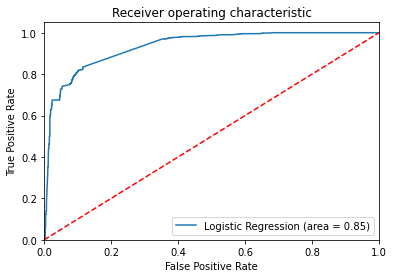

In [83]:
logit_roc_auc = metrics.roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [84]:
y_score = logreg.predict_proba(X)[:, 1]

precision, recall, thresholds = metrics.precision_recall_curve(y, y_score)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={metrics.auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

In [85]:
X.head(1)

,Temp_fecha_de_registro_month_Apr,Temp_pais_CRI,Temp_como_llego_lic_,Temp_pais_GTM,habilidades_acabadas_con_insignia_cnt,Temp_fecha_de_registro_month_Oct,Temp_correo_confirmado_Sí,evidencias_consultadas,habilidades_completadas
0,0.0,0.0,0.0,0.0,1,0.0,1.0,17,3


In [86]:
# initialise data of lists.
data_tmp_test = [[ 1.,  0.,  0.,  0.,  1.,  0.,  1., 17.,  3.]]
 
# Create DataFrame
df_tmp_test = pd.DataFrame(data_tmp_test, columns = ['Temp_fecha_de_registro_month_Apr', 
                                                   'Temp_pais_CRI',
                                                   'Temp_como_llego_lic_', 
                                                   'Temp_pais_GTM',
                                                   'habilidades_acabadas_con_insignia_cnt',
                                                   'Temp_fecha_de_registro_month_Oct', 
                                                   'Temp_correo_confirmado_Sí',
                                                   'evidencias_consultadas', 
                                                   'habilidades_completadas'])
 
# Print the output.
df_tmp_test

,Temp_fecha_de_registro_month_Apr,Temp_pais_CRI,Temp_como_llego_lic_,Temp_pais_GTM,habilidades_acabadas_con_insignia_cnt,Temp_fecha_de_registro_month_Oct,Temp_correo_confirmado_Sí,evidencias_consultadas,habilidades_completadas
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,17.0,3.0


In [87]:
y_score_test = logreg.predict_proba(df_tmp_test)[:, 1]
y_score_test[0]

0.2814402950233215

In [88]:
%run Users_Helper.ipynb
%run Users_Plot.ipynb

In [89]:
plottingHelper._logreg = logreg
ipywidgets.interact(
    plottingHelper.func_logreg_plotty,
    txt_1=ipywidgets.Checkbox(
        value=True,
        description="Fecha_de_registro_month_Apr",
        disabled=False,
        indent=False,
    ),
    txt_2=ipywidgets.BoundedFloatText(
        value=0.0, min=0, max=1000.0, step=0.1, description="Pais_CRI:", disabled=False
    ),
    txt_3=ipywidgets.BoundedFloatText(
        value=0.0,
        min=0,
        max=1000.0,
        step=0.1,
        description="Como_llego_lic_:",
        disabled=False,
    ),
    txt_4=ipywidgets.BoundedFloatText(
        value=0.0, min=0, max=10.0, step=0.1, description="Pais_GTM:", disabled=False
    ),
    txt_5=ipywidgets.BoundedFloatText(
        value=1.0,
        min=0,
        max=1000.0,
        step=0.1,
        description="Habilidades_acabadas_con_insignia_cnt:",
        disabled=False,
    ),
    txt_6=ipywidgets.BoundedFloatText(
        value=0.0,
        min=0,
        max=1000.0,
        step=0.1,
        description="Fecha_de_registro_month_Oct:",
        disabled=False,
    ),
    txt_7=ipywidgets.BoundedFloatText(
        value=1.0,
        min=0,
        max=1000.0,
        step=0.1,
        description="Correo_confirmado_Sí:",
        disabled=False,
    ),
    txt_8=ipywidgets.BoundedFloatText(
        value=17.0,
        min=0,
        max=1000.0,
        step=0.1,
        description="Evidencias_consultadas:",
        disabled=False,
    ),
    txt_9=ipywidgets.BoundedFloatText(
        value=3.0,
        min=0,
        max=1000.0,
        step=0.1,
        description="Habilidades_completadas:",
        disabled=False,
    ),
)

interactive(children=(Checkbox(value=True, description='Fecha_de_registro_month_Apr', indent=False), BoundedFl…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>